In [3]:
import sys
sys.path.append("../classification/scripts")
import torch
from torchvision.transforms import transforms as T
from PIL import Image
import kornia as K
import pandas as pd
import json
from scripts.augmentation import PreProcess, DataAugmentation
from scripts.service import get_class_decoder
from os.path import join


ModuleNotFoundError: No module named 'scripts'

In [2]:
IMAGE_DIR = "/home/timssh/ML/TAGGING/data"
SOURCE = "/home/timssh/ML/TAGGING/source"
path_model = '/home/timssh/ML/TAGGING/source/comet/pose/version_2_train/checkpoints/epoch=31-step=187_script.pt'
Pre = PreProcess(False)
Aug = DataAugmentation()
ToTensor = T.PILToTensor()
model = torch.jit.load(path_model)
model.eval()
imgs = [
    '/home/timssh/ML/TAGGING/data/pose/doggy/Doggy/picture/10541088_011_d621.jpg',
    '/home/timssh/ML/TAGGING/data/pose/doggy/Doggy/picture/14519077_009_9c32.jpg',
    '/home/timssh/ML/TAGGING/data/pose/69/69-porn-373/picture/0a5613066cd719f53986178e1e0d7bf1.jpeg'
    
    ]

In [3]:
def loss_mixup(y, logits):
    criterion = F.cross_entropy
    loss_a = criterion(logits, y[:, 0].long(), reduction='none')
    loss_b = criterion(logits, y[:, 1].long(), reduction='none')
    return ((1 - y[:, 2]) * loss_a + y[:, 2] * loss_b).mean()

def acc_mixup(y, logits):
    pred = torch.argmax(logits, dim=1).to(y.device)
    return (1 - y[:, 2]) * pred.eq(y[:, 0]).float() + y[:, 2] * pred.eq(y[:, 1]).float()

In [4]:
lst = []
for i in range(2):
    image = Image.open(imgs[i])
    image = ToTensor(image)
    image = Pre(image.float())
    image = Aug(image)
    lst.append(image)


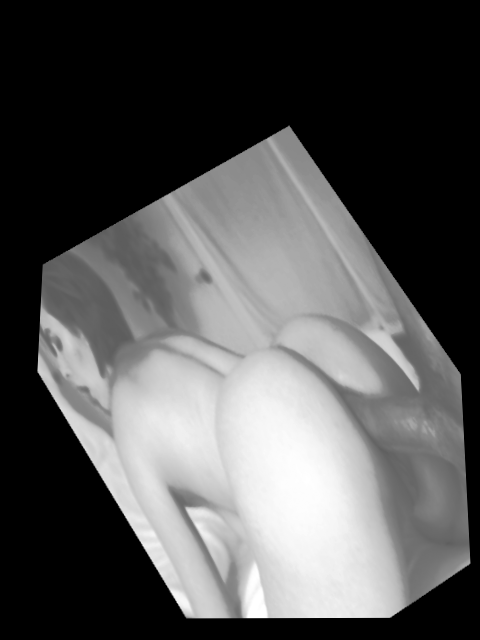

In [5]:
T.ToPILImage()(lst[0][0].squeeze(1))

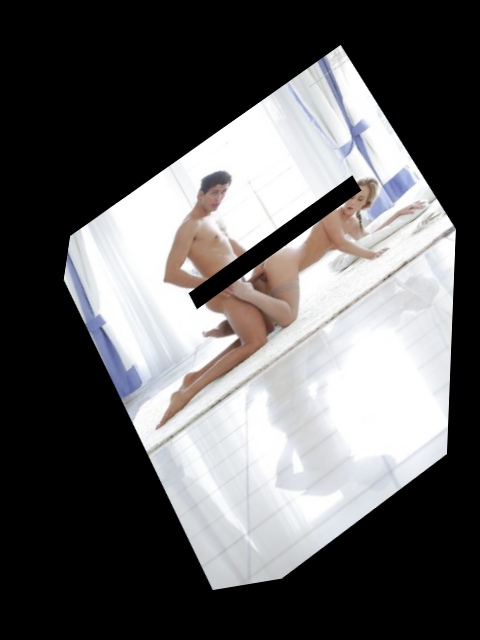

In [6]:
T.ToPILImage()(lst[1][0].squeeze(1))

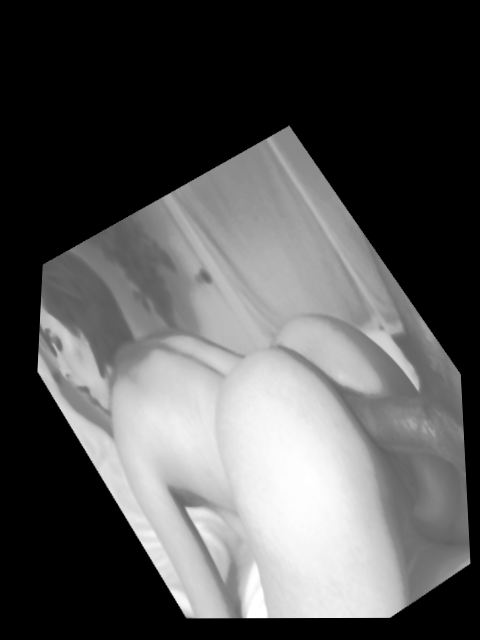

In [26]:
# rng = torch.manual_seed(1)
input = torch.cat(lst, dim=0)
label = torch.tensor([1, 2])
mixup = K.augmentation.RandomMixUpV2(data_keys=["input", "class"], p=1)
ret = mixup(input, label)
T.ToPILImage()(ret[0][0].squeeze(1))

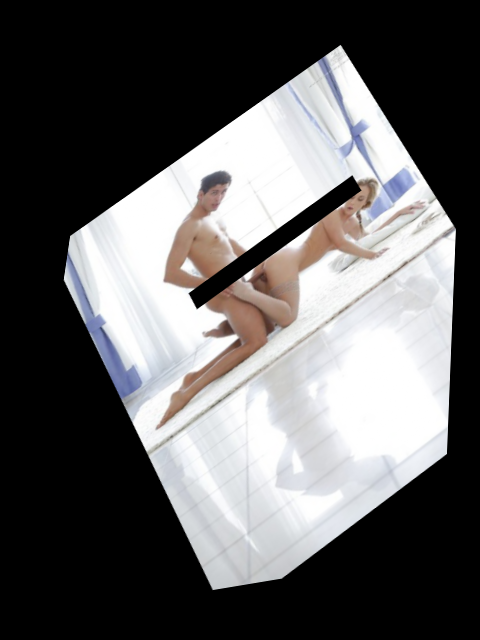

: 

In [27]:
T.ToPILImage()(ret[0][1].squeeze(1))

In [19]:
ret[1]

tensor([[1.0000, 1.0000, 0.3641],
        [2.0000, 2.0000, 0.8493]])

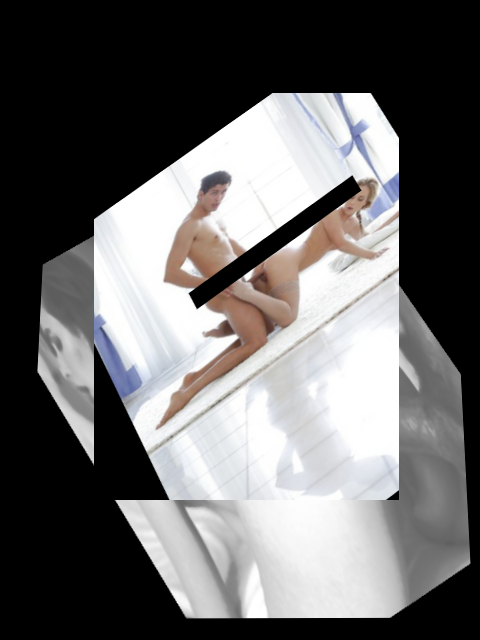

In [14]:
label = torch.tensor([1, 2])
CutMix = K.augmentation.RandomCutMixV2( p=1, data_keys=["input", "class"])
ret = CutMix(input, label)
T.ToPILImage()(ret[0][0].squeeze(1))

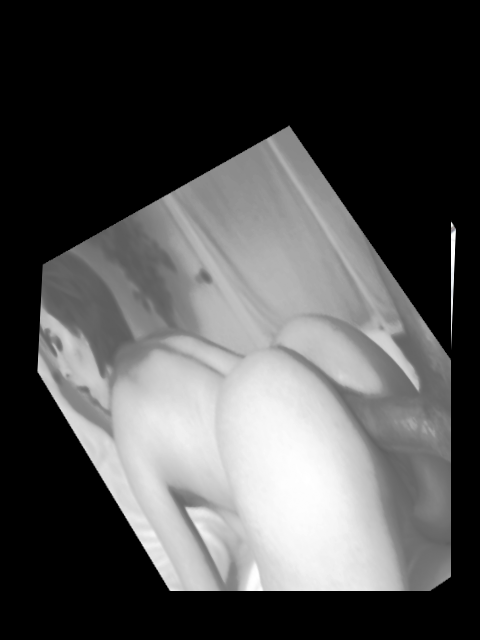

In [15]:
T.ToPILImage()(ret[0][1].squeeze(1))

In [16]:
ret[1]

tensor([[[1.0000, 2.0000, 0.4041],
         [2.0000, 1.0000, 0.7624]]])